In [1]:
from sklearn import datasets
import pandas as pd

In [2]:
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)
print(data_breast_cancer['DESCR'])


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
X = data_breast_cancer.data[['mean smoothness','mean area']].values
X

array([[1.184e-01, 1.001e+03],
       [8.474e-02, 1.326e+03],
       [1.096e-01, 1.203e+03],
       ...,
       [8.455e-02, 8.581e+02],
       [1.178e-01, 1.265e+03],
       [5.263e-02, 1.810e+02]])

In [4]:
y = data_breast_cancer['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [5]:
# data_iris = datasets.load_iris()
# print(data_iris['DESCR'])
# data_iris.target

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [9]:
svm_clf = LinearSVC(loss = 'hinge')

In [10]:
svm_clf.fit(X_train,y_train)

/home/dia/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/dia/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(loss='hinge')

In [11]:
from sklearn.metrics import accuracy_score
import pickle
acc = []
y_predict = svm_clf.predict(X_train)
acc.append(accuracy_score(y_train,y_predict))
acc


[0.6417582417582418]

In [12]:
y_predict = svm_clf.predict(X_test)
acc.append(accuracy_score(y_test,y_predict))
acc

[0.6417582417582418, 0.5701754385964912]

In [13]:
svm_clf = make_pipeline(StandardScaler(),LinearSVC(C=1, loss = 'hinge'))
svm_clf.fit(X_train,y_train)
model1 = svm_clf.predict(X_train)
acc.append(accuracy_score(y_train,model1))
model2 = svm_clf.predict(X_test)
acc.append(accuracy_score(y_test,model2))
acc

/home/dia/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[0.6417582417582418,
 0.5701754385964912,
 0.9142857142857143,
 0.8157894736842105]

In [14]:
with open('bc_acc.pkl', 'wb') as f:
    pickle.dump(acc, f)

acc

[0.6417582417582418,
 0.5701754385964912,
 0.9142857142857143,
 0.8157894736842105]

In [15]:
data_iris = datasets.load_iris(as_frame=True)
print(data_iris['DESCR'])
data_iris

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [16]:
X = data_iris.data[['petal length (cm)',  'petal width (cm)']].values
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [17]:
y = (data_iris.target==2)
y

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: target, Length: 150, dtype: bool

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
svm_clf = LinearSVC(C=1, loss = 'hinge')
svm_clf.fit(X_train,y_train)

/home/dia/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/dia/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1, loss='hinge')

In [20]:
acc = []
y_predict = svm_clf.predict(X_train)
acc.append(accuracy_score(y_train,y_predict))
y_predict = svm_clf.predict(X_test)
acc.append(accuracy_score(y_test,y_predict))
acc

[0.95, 0.9666666666666667]

In [21]:
svm_clf = make_pipeline(StandardScaler(),LinearSVC(C=1, loss = 'hinge'))
svm_clf.fit(X_train,y_train)
model1 = svm_clf.predict(X_train)
acc.append(accuracy_score(y_train,model1))
model2 = svm_clf.predict(X_test)
acc.append(accuracy_score(y_test,model2))
acc

/home/dia/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[0.95, 0.9666666666666667, 0.95, 0.9666666666666667]

In [22]:
with open('iris_acc.pkl', 'wb') as f:
    pickle.dump(acc, f)

(900,)


(900,)

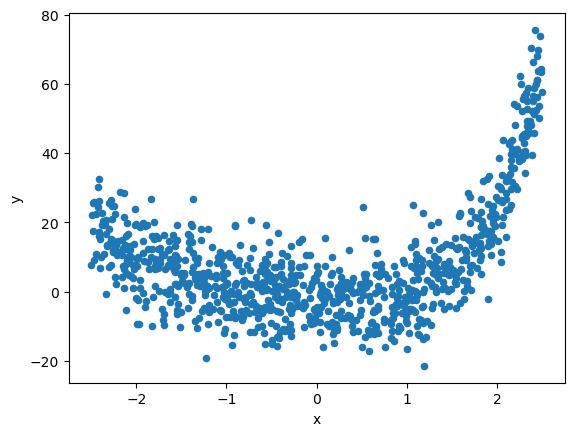

In [23]:
import numpy as np
import pandas as pd
size = 900
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')
print(y.shape)
X.shape

In [24]:
X= X.reshape(-1, 1)
print(X.shape)
y = y.reshape(-1, 1)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

(900, 1)
(900, 1)


In [25]:
from sklearn.svm import LinearSVR
from sklearn.preprocessing import PolynomialFeatures
polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=4),
    StandardScaler(),
    LinearSVR()
)
polynomial_svm_clf.fit(X_train, y_train)

/home/dia/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dia/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR())])

In [26]:
from sklearn.metrics import mean_squared_error
x = []
model1 = polynomial_svm_clf.predict(X_train)
x.append(mean_squared_error(y_train,model1))
model2 = polynomial_svm_clf.predict(X_test)
x.append(mean_squared_error(y_test,model2))
x

[59.508676346618934, 62.2497739469511]

In [27]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline


poly_kernel_svm_clf = Pipeline([
                    ("scaler", StandardScaler()),
                    ("svm_clf", SVR(kernel="poly", degree=4))])

poly_kernel_svm_clf.fit(X, y)

/home/dia/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVR(degree=4, kernel='poly'))])

In [28]:

model1 = poly_kernel_svm_clf.predict(X_train)
print(mean_squared_error(y_train,model1))
model2 = poly_kernel_svm_clf.predict(X_test)
print(mean_squared_error(y_test,model2))


119.91170368776314
126.75944356770444


In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid = {
"svm_clf__C" : [0.1, 1, 10],
"svm_clf__coef0" : [0.1, 1, 10]  
}

search = GridSearchCV(poly_kernel_svm_clf,
                        param_grid,
                        scoring = "neg_mean_squared_error",
                        n_jobs=-1)

search

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm_clf',
                                        SVR(degree=4, kernel='poly'))]),
             n_jobs=-1,
             param_grid={'svm_clf__C': [0.1, 1, 10],
                         'svm_clf__coef0': [0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [31]:
search.fit(X_train, y_train)


/home/dia/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dia/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dia/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dia/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array w

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm_clf',
                                        SVR(degree=4, kernel='poly'))]),
             n_jobs=-1,
             param_grid={'svm_clf__C': [0.1, 1, 10],
                         'svm_clf__coef0': [0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [32]:
print(f"Cross-validated accuracy = {search.best_score_}")
print(search.best_params_)


Cross-validated accuracy = -59.70276363380151
{'svm_clf__C': 10, 'svm_clf__coef0': 1}


In [33]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline


poly_kernel_svm_clf = Pipeline([
                    ("scaler", StandardScaler()),
                    ("svm_clf", SVR(kernel="poly", degree=4, coef0 = 1, C=1))])

poly_kernel_svm_clf.fit(X, y)
model1 = poly_kernel_svm_clf.predict(X_train)
x.append(mean_squared_error(y_train,model1))
model2 = poly_kernel_svm_clf.predict(X_test)
x.append(mean_squared_error(y_test,model2))
x

/home/dia/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[59.508676346618934, 62.2497739469511, 59.047653977415564, 61.88592366267552]

In [34]:
with open('reg_mse.pkl', 'wb') as f:
    pickle.dump(x, f)

In [35]:
acc

[0.95, 0.9666666666666667, 0.95, 0.9666666666666667]

In [36]:
x

[59.508676346618934, 62.2497739469511, 59.047653977415564, 61.88592366267552]